# Bổ sung các công việc như với yêu cầu cập nhật của yêu cầu ở 3)

In [ ]:
!pip install pystan==2.19.1.1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.6 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641372 sha256=d9efbbb23b2dfd955dafc8f01585d73a4a5e0bf399abffde6995d468e35a5209
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 3.8 MB/s 
     |████████████████████████████████| 9.8 MB 39.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
!pip install statsmodels --upgrade

# Part I) Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [4]:
import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from pmdarima import auto_arima

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg

# Part II) Import Dataset

In [6]:
datas = pd.read_csv('/content/drive/MyDrive/Avocado/avocado.csv')
datas = datas.iloc[:, 1:]

# Part III) Select Region

In [7]:
Sp = datas.query('region == "Spokane"')
Sp['Date'] = Sp['Date'].str[:-3]
Sp


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2444,2015-12,1.05,67099.38,20577.16,21592.44,2889.97,22039.81,21900.09,0.00,139.72,conventional,2015,Spokane
2445,2015-12,1.12,61555.62,17819.26,16576.75,2660.37,24499.24,24499.24,0.00,0.00,conventional,2015,Spokane
2446,2015-12,0.99,67431.18,22229.24,20738.68,2189.59,22273.67,22269.39,4.28,0.00,conventional,2015,Spokane
2447,2015-12,0.85,100233.67,18780.00,39234.39,2758.78,39460.50,38946.79,513.71,0.00,conventional,2015,Spokane
2448,2015-11,1.17,51432.09,16876.93,16826.84,2523.85,15204.47,15204.47,0.00,0.00,conventional,2015,Spokane
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18172,2018-02,1.70,4561.62,277.76,1722.99,0.00,2560.87,593.40,1948.18,19.29,organic,2018,Spokane
18173,2018-01,1.70,4300.76,195.24,1169.26,0.00,2936.26,535.55,2400.71,0.00,organic,2018,Spokane
18174,2018-01,1.76,4532.08,227.35,1340.50,0.00,2964.23,745.55,2216.30,2.38,organic,2018,Spokane
18175,2018-01,1.85,4412.54,150.54,1948.36,0.00,2313.64,564.45,1749.19,0.00,organic,2018,Spokane


# Part IV) Select type

In [8]:
Sp_con = Sp.query('type == "conventional"')
Sp_con

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2444,2015-12,1.05,67099.38,20577.16,21592.44,2889.97,22039.81,21900.09,0.00,139.72,conventional,2015,Spokane
2445,2015-12,1.12,61555.62,17819.26,16576.75,2660.37,24499.24,24499.24,0.00,0.00,conventional,2015,Spokane
2446,2015-12,0.99,67431.18,22229.24,20738.68,2189.59,22273.67,22269.39,4.28,0.00,conventional,2015,Spokane
2447,2015-12,0.85,100233.67,18780.00,39234.39,2758.78,39460.50,38946.79,513.71,0.00,conventional,2015,Spokane
2448,2015-11,1.17,51432.09,16876.93,16826.84,2523.85,15204.47,15204.47,0.00,0.00,conventional,2015,Spokane
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,2018-02,0.98,141362.77,36203.06,49563.73,560.55,55035.43,21807.59,33030.13,197.71,conventional,2018,Spokane
9050,2018-01,1.16,88197.75,25211.46,28636.94,406.68,33942.67,23389.62,10519.31,33.74,conventional,2018,Spokane
9051,2018-01,1.07,105005.26,24435.65,33395.51,517.34,46656.76,22478.80,24044.51,133.45,conventional,2018,Spokane
9052,2018-01,1.20,102537.95,25067.66,30621.77,483.20,46365.32,22425.95,23850.96,88.41,conventional,2018,Spokane


In [9]:
Sp_org = Sp.query('type == "organic"')
Sp_org

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11570,2015-12,1.59,1723.36,41.54,1206.17,0.0,475.65,12.85,462.80,0.00,organic,2015,Spokane
11571,2015-12,1.56,1711.63,42.41,1048.06,0.0,621.16,0.00,621.16,0.00,organic,2015,Spokane
11572,2015-12,1.32,2568.24,38.55,1587.44,0.0,942.25,0.00,942.25,0.00,organic,2015,Spokane
11573,2015-12,2.09,1153.00,56.94,972.98,0.0,123.08,0.00,123.08,0.00,organic,2015,Spokane
11574,2015-11,1.80,1180.38,42.33,825.93,0.0,312.12,0.00,312.12,0.00,organic,2015,Spokane
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18172,2018-02,1.70,4561.62,277.76,1722.99,0.0,2560.87,593.40,1948.18,19.29,organic,2018,Spokane
18173,2018-01,1.70,4300.76,195.24,1169.26,0.0,2936.26,535.55,2400.71,0.00,organic,2018,Spokane
18174,2018-01,1.76,4532.08,227.35,1340.50,0.0,2964.23,745.55,2216.30,2.38,organic,2018,Spokane
18175,2018-01,1.85,4412.54,150.54,1948.36,0.0,2313.64,564.45,1749.19,0.00,organic,2018,Spokane


# Predict on Spokane conventional avocado price

In [10]:
df_con_price = Sp_con.iloc[:, :2]

In [11]:
df_con_price

,Date,AveragePrice
2444,2015-12,1.05
2445,2015-12,1.12
2446,2015-12,0.99
2447,2015-12,0.85
2448,2015-11,1.17
...,...,...
9049,2018-02,0.98
9050,2018-01,1.16
9051,2018-01,1.07
9052,2018-01,1.20


In [12]:
agg = {'AveragePrice':'mean'}
df_con_price = df_con_price.groupby(df_con_price['Date']).aggregate(agg).reset_index()
df_con_price

,Date,AveragePrice
0,2015-01,1.1150
1,2015-02,1.0675
2,2015-03,1.1240
3,2015-04,1.1175
4,2015-05,1.0500
5,2015-06,1.1600
6,2015-07,1.1525
7,2015-08,1.1480
8,2015-09,1.0625
9,2015-10,1.0350


In [13]:
df_con_price['Date'] = pd.to_datetime(df_con_price['Date'])
df_con_price.rename(columns={"Date":"ds", "AveragePrice":"y"}, inplace = True);
df_con_price

,ds,y
0,2015-01-01,1.1150
1,2015-02-01,1.0675
2,2015-03-01,1.1240
3,2015-04-01,1.1175
4,2015-05-01,1.0500
5,2015-06-01,1.1600
6,2015-07-01,1.1525
7,2015-08-01,1.1480
8,2015-09-01,1.0625
9,2015-10-01,1.0350


In [14]:
from statsmodels.tsa.stattools import adfuller
adfuller = adfuller(df_con_price.iloc[:, 1])
print("P-values of adfuller: ", adfuller[1])
print("ADF Statistic of adfuller: ", adfuller[0])
print("Critial Values of adfuller: ", adfuller[4])

P-values of adfuller:  0.9943585751362765
ADF Statistic of adfuller:  1.0088616798472225
Critial Values of adfuller:  {'1%': -3.6790595944893187, '5%': -2.9678817237279103, '10%': -2.6231583472057074}


<Figure size 1080x576 with 0 Axes>

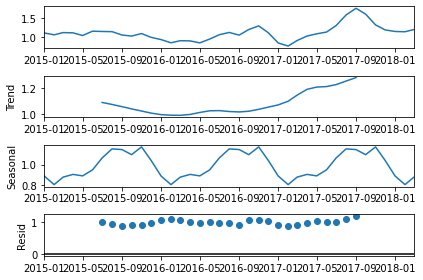

In [15]:
decompose_con = df_con_price.set_index('ds')

decompose_con
decompose_con_price = seasonal_decompose(decompose_con, model='multiplicative')

plt.figure(figsize=(15,8))
decompose_con_price.plot()


plt.show()

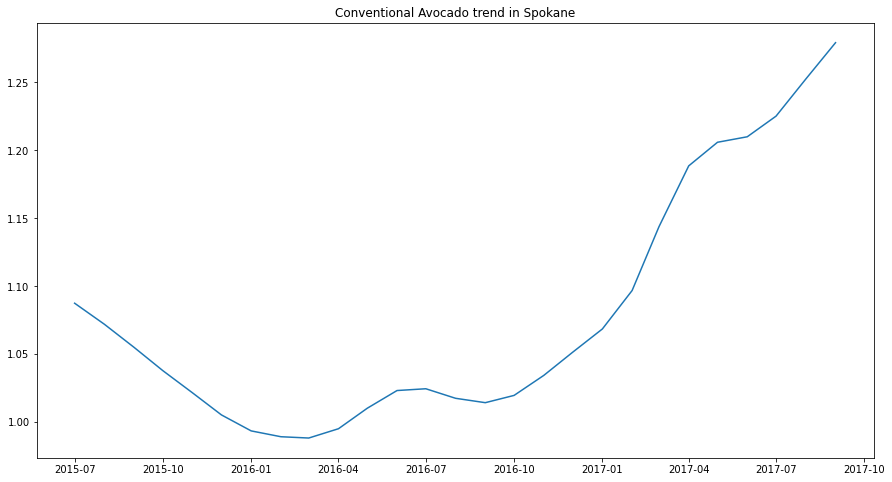

In [16]:
plt.figure(figsize=(15,8))
plt.plot(decompose_con_price.trend)
plt.title("Conventional Avocado trend in Spokane")
plt.show()

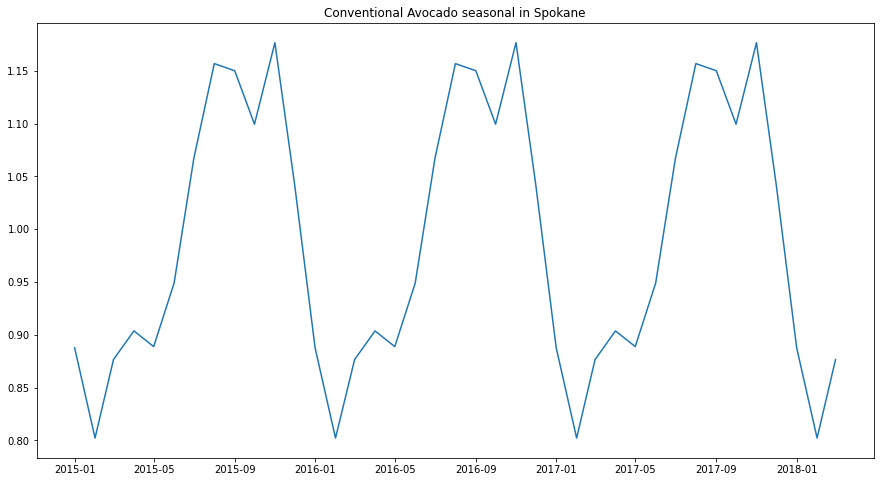

In [112]:
plt.figure(figsize=(15,8))
plt.plot(decompose_con_price.seasonal)
plt.title("Conventional Avocado seasonal in Spokane")
plt.show()

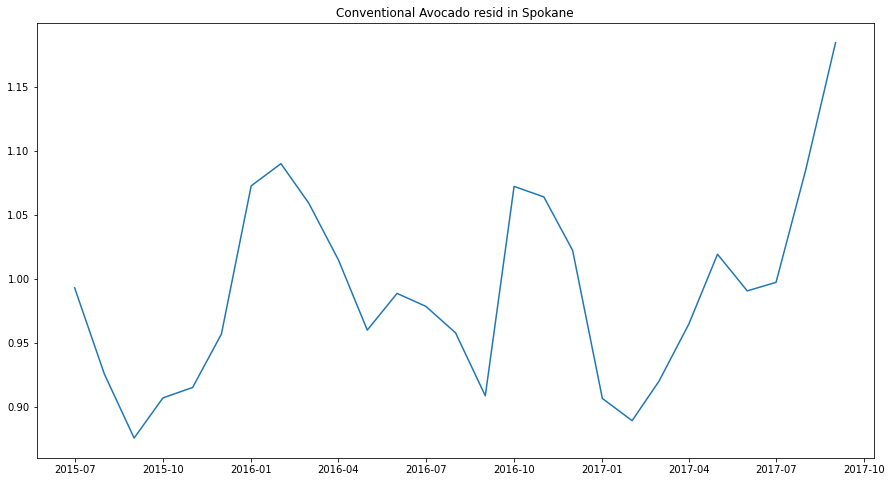

In [114]:
plt.figure(figsize=(15,8))
plt.plot(decompose_con_price.resid)
plt.title("Conventional Avocado resid in Spokane")
plt.show()

## Kết luận:

  Trend có tính đi lên nhưng mang tính non-linear, thấy rõ tính seasonal, Residual cho thấy có khoảng từ 0.87 đến 1.15

# Part III) Train Test split

In [17]:
train_con = df_con_price.iloc[:-10, :]
train_con

,ds,y
0,2015-01-01,1.1150
1,2015-02-01,1.0675
2,2015-03-01,1.1240
3,2015-04-01,1.1175
4,2015-05-01,1.0500
5,2015-06-01,1.1600
6,2015-07-01,1.1525
7,2015-08-01,1.1480
8,2015-09-01,1.0625
9,2015-10-01,1.0350


In [18]:
test_con = df_con_price.iloc[-10:, :]
test_con

,ds,y
29,2017-06-01,1.1375
30,2017-07-01,1.3040
31,2017-08-01,1.5725
32,2017-09-01,1.7425
33,2017-10-01,1.5940
34,2017-11-01,1.3200
35,2017-12-01,1.1920
36,2018-01-01,1.1525
37,2018-02-01,1.1450
38,2018-03-01,1.2025


 # Part VI) Short Predict on Spokane conventional avocado price

In [19]:
model_con_price = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model_con_price.fit(train_con)

INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


Em chọn:

    interval_width parameter là vì nếu mà dự đoán càng về sau thì trend sẽ có dao động nên em lựa parameter là để có tỷ lệ linh hoạt trong dự đoán

    yearly_seasonality=True là vì em thấy nó có tính seasonal yearly

    daily_seasonality=False, weekly_seasonality=False vì em muố dự đoán dự trên tính seasonal yearly

In [20]:
future_con_price = model_con_price.make_future_dataframe(periods=22, freq='M')

In [21]:
future_con_price

,ds
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [22]:
months = pd.date_range('2017-06-01', '2019-03-01', 
                       freq='MS').strftime("%Y-%m-%d").tolist()
months

['2017-06-01',
 '2017-07-01',
 '2017-08-01',
 '2017-09-01',
 '2017-10-01',
 '2017-11-01',
 '2017-12-01',
 '2018-01-01',
 '2018-02-01',
 '2018-03-01',
 '2018-04-01',
 '2018-05-01',
 '2018-06-01',
 '2018-07-01',
 '2018-08-01',
 '2018-09-01',
 '2018-10-01',
 '2018-11-01',
 '2018-12-01',
 '2019-01-01',
 '2019-02-01',
 '2019-03-01']

In [23]:
future_con_price_1 = pd.DataFrame(months)
future_con_price_1.columns = ['ds']
future_con_price_1['ds'] = pd.to_datetime(future_con_price_1['ds'])
future_con_price_1

,ds
0,2017-06-01
1,2017-07-01
2,2017-08-01
3,2017-09-01
4,2017-10-01
5,2017-11-01
6,2017-12-01
7,2018-01-01
8,2018-02-01
9,2018-03-01


In [24]:
forecast_con_price = model_con_price.predict(future_con_price_1)

In [25]:
forecast_con_price

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-06-01,1.127581,1.023619,1.155286,1.124990,1.130075,-0.038272,-0.038272,-0.038272,-0.038272,-0.038272,-0.038272,0.0,0.0,0.0,1.089309
1,2017-07-01,1.135581,1.101220,1.237120,1.128415,1.142867,0.030987,0.030987,0.030987,0.030987,0.030987,0.030987,0.0,0.0,0.0,1.166567
2,2017-08-01,1.143847,1.140153,1.280701,1.130807,1.157569,0.066971,0.066971,0.066971,0.066971,0.066971,0.066971,0.0,0.0,0.0,1.210818
3,2017-09-01,1.152113,1.074459,1.219638,1.132555,1.174158,-0.005259,-0.005259,-0.005259,-0.005259,-0.005259,-0.005259,0.0,0.0,0.0,1.146854
4,2017-10-01,1.160112,1.163808,1.310165,1.132473,1.190444,0.084305,0.084305,0.084305,0.084305,0.084305,0.084305,0.0,0.0,0.0,1.244418
5,2017-11-01,1.168379,1.251911,1.412979,1.130177,1.208003,0.165980,0.165980,0.165980,0.165980,0.165980,0.165980,0.0,0.0,0.0,1.334359
6,2017-12-01,1.176378,1.111410,1.280371,1.128844,1.225696,0.017260,0.017260,0.017260,0.017260,0.017260,0.017260,0.0,0.0,0.0,1.193638
7,2018-01-01,1.184644,0.911958,1.082536,1.124832,1.243293,-0.185084,-0.185084,-0.185084,-0.185084,-0.185084,-0.185084,0.0,0.0,0.0,0.999560
8,2018-02-01,1.192910,0.863917,1.048134,1.118377,1.261457,-0.239313,-0.239313,-0.239313,-0.239313,-0.239313,-0.239313,0.0,0.0,0.0,0.953597
9,2018-03-01,1.200377,0.952349,1.161187,1.116480,1.278326,-0.143989,-0.143989,-0.143989,-0.143989,-0.143989,-0.143989,0.0,0.0,0.0,1.056388


In [26]:
forecast_con_price[['ds', 'yhat']].head(10)

,ds,yhat
0,2017-06-01,1.089309
1,2017-07-01,1.166567
2,2017-08-01,1.210818
3,2017-09-01,1.146854
4,2017-10-01,1.244418
5,2017-11-01,1.334359
6,2017-12-01,1.193638
7,2018-01-01,0.999560
8,2018-02-01,0.953597
9,2018-03-01,1.056388


In [27]:
y_test = test_con['y'].values
y_pred = forecast_con_price['yhat'].values[:10]

mea_p = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mea_p)


MAE: 0.200


In [28]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE: %.3f' % mape)

MAPE: 0.137


In [29]:
rmse_p = sqrt(mean_absolute_error(y_test, y_pred))
print('RMSE: %.3f' % rmse_p)

RMSE: 0.447


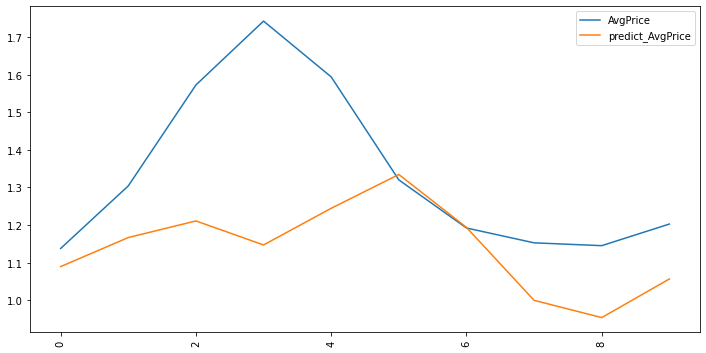

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="AvgPrice")
plt.plot(y_pred, label="predict_AvgPrice")
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

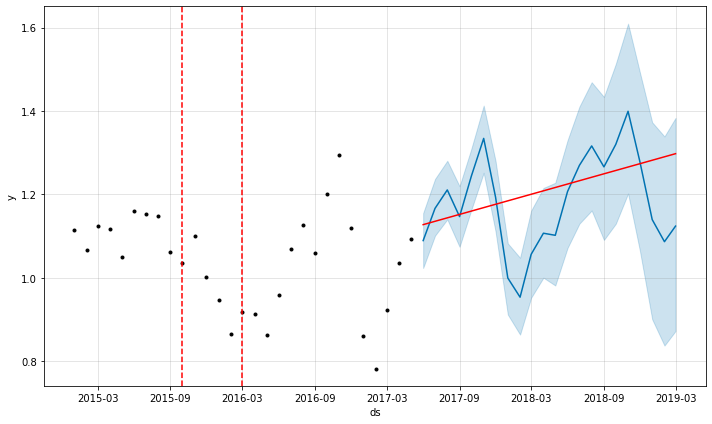

In [31]:
from fbprophet.plot import add_changepoints_to_plot
fig = model_con_price.plot(forecast_con_price)
fig.show()

a= add_changepoints_to_plot(fig.gca(), model_con_price, forecast_con_price)

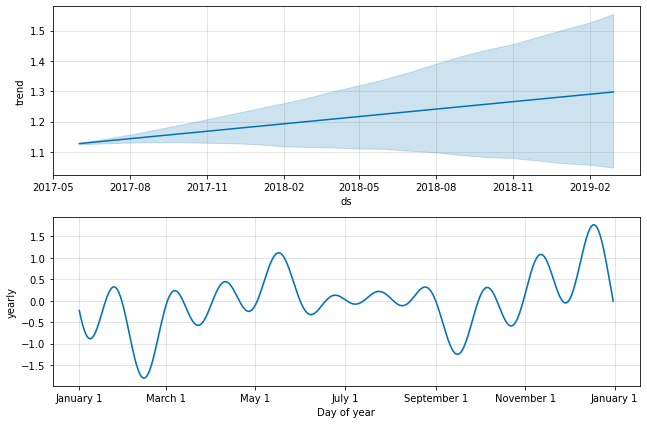

In [32]:
fig = model_con_price.plot_components(forecast_con_price)
fig.show()

In [33]:
forecast_con_price[['ds', 'yhat']].head(12)

,ds,yhat
0,2017-06-01,1.089309
1,2017-07-01,1.166567
2,2017-08-01,1.210818
3,2017-09-01,1.146854
4,2017-10-01,1.244418
5,2017-11-01,1.334359
6,2017-12-01,1.193638
7,2018-01-01,0.999560
8,2018-02-01,0.953597
9,2018-03-01,1.056388


# Part V) Long Predict on Spokane conventional avocado price

In [34]:
from pandas._libs.tslibs import period
long_model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
long_model.fit(df_con_price)
long_future = long_model.make_future_dataframe(periods=12*5, freq='M')

In [35]:
long_forecast = long_model.predict(long_future)

In [36]:
long_forecast[['ds', 'trend', ]].tail(12)

,ds,trend
87,2022-03-31,2.180719
88,2022-04-30,2.197145
89,2022-05-31,2.214118
90,2022-06-30,2.230544
91,2022-07-31,2.247517
92,2022-08-31,2.264491
93,2022-09-30,2.280917
94,2022-10-31,2.297890
95,2022-11-30,2.314316
96,2022-12-31,2.331289


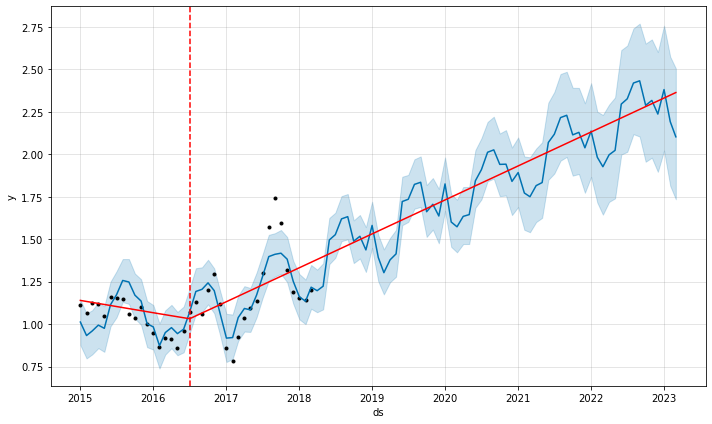

In [37]:

fig_long = long_model.plot(long_forecast)
fig_long.show()

a_long= add_changepoints_to_plot(fig_long.gca(), long_model, long_forecast)

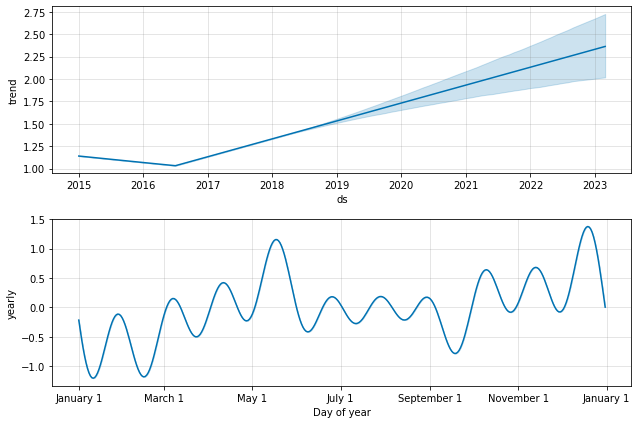

In [38]:
fig_long = long_model.plot_components(long_forecast)
fig_long.show()

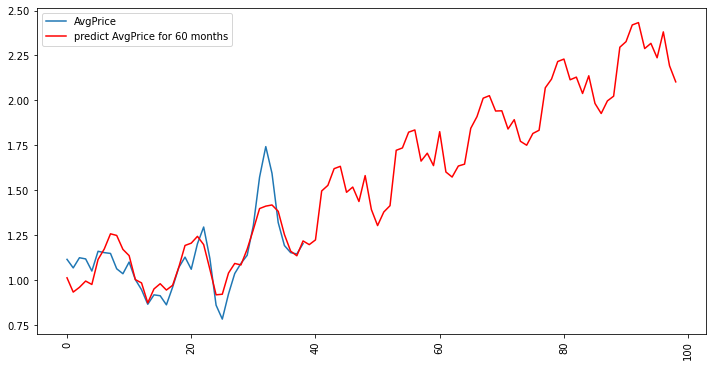

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(df_con_price['y'], label="AvgPrice")
plt.plot(long_forecast['yhat'], label="predict AvgPrice for 60 months", color ='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

### Em sẽ sử dụng phép toán Autoregression để so sánh

In [40]:
decompose_con

,y
ds,
2015-01-01,1.1150
2015-02-01,1.0675
2015-03-01,1.1240
2015-04-01,1.1175
2015-05-01,1.0500
2015-06-01,1.1600
2015-07-01,1.1525
2015-08-01,1.1480
2015-09-01,1.0625


In [41]:
X_tr_AR = decompose_con.query('ds <= "2017-06-01"')
X_te_AR = decompose_con.query('ds >= "2017-06-01"')

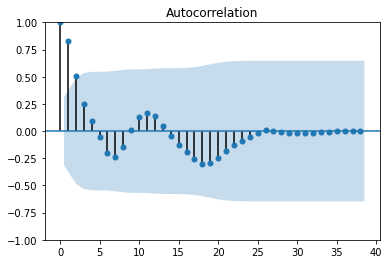

In [42]:


plot_acf(decompose_con, lags=38)
plt.show()

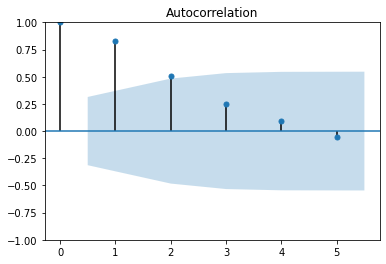

In [43]:
plot_acf(decompose_con, lags=5)
plt.show()

# Training Autoregression with lags =1

In [44]:
model_lag1 = AutoReg(X_tr_AR, lags= 1).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
pred_lag1 = model_lag1.predict(start=len(X_tr_AR), end=len(X_tr_AR)+len(X_te_AR)-1, dynamic=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [46]:

y_test_lag1 = X_te_AR['y'].values
y_pred_lag1 = pred_lag1.values

mea_p_AR1 = mean_absolute_error(y_test_lag1, y_pred_lag1)
print('MAE: %.3f' % mea_p_AR1)


MAE: 0.274


In [47]:
mape_AR1 = mean_absolute_percentage_error(y_test_lag1, y_pred_lag1)
print('MAPE: %.3f' % mape_AR1)

MAPE: 0.187


In [48]:
rmse_p_AR1 = sqrt(mean_absolute_error(y_test_lag1, y_pred_lag1))
print('RMSE: %.3f' % rmse_p_AR1)

RMSE: 0.524


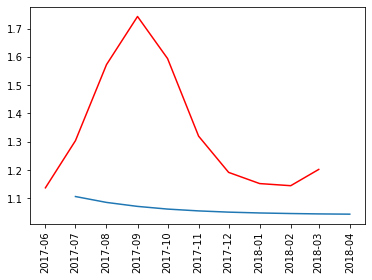

In [49]:
plt.plot(pred_lag1)
plt.plot(X_te_AR, color = 'red')
plt.xticks(rotation='vertical')
plt.show()

# Showing the MAE and plot of all the possible lags

In [50]:
p_r=range(0, 15)

In [51]:
y_test_AR = X_te_AR['y'].values

In [52]:
mae=[]
order1=[]

In [53]:

for p in p_r:
  try:
        model = AutoReg(X_tr_AR, lags= p).fit()
        pred = model.predict(start=len(X_tr_AR), end=len(X_tr_AR)+len(X_te_AR)-1, dynamic=False)
        error = mean_absolute_error(y_test_AR, pred)
        order1.append(p)
        mae.append(p)
        mae.append(error)

  except:
       continue


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain t

In [54]:
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct

In [55]:
dict_mae = Convert(mae)
dict_mae

{0: 0.29281666666666695,
 1: 0.2742452704538235,
 2: 0.287252842179415,
 3: 0.2940275944095382,
 4: 0.2909679989993027,
 5: 0.29257546103995746,
 6: 0.3090813228045001,
 7: 0.32714038125813155,
 8: 0.32176011480372413,
 9: 0.34086745299668275,
 10: 0.4272876763237997,
 11: 0.5008559245416496,
 12: 0.48101183305570155,
 13: 0.9137835118911811,
 14: 2.5325110736208964}

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


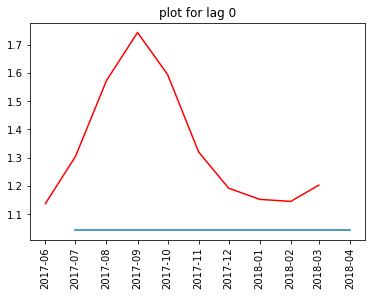

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


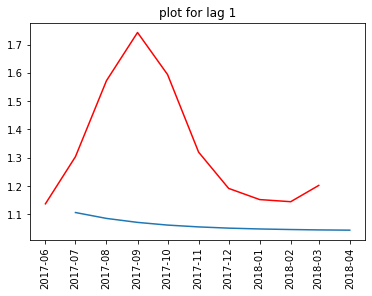

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


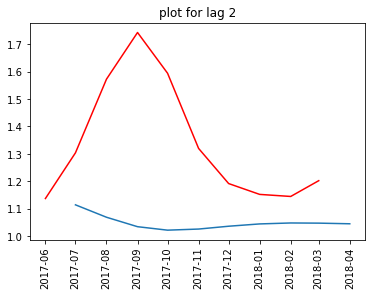

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


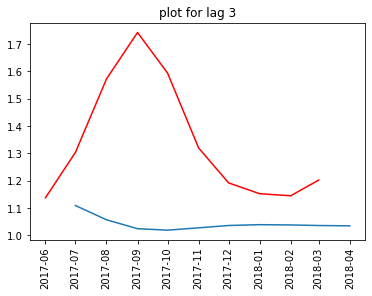

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


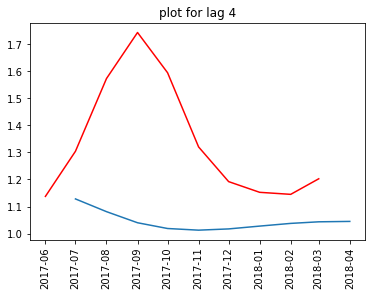

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


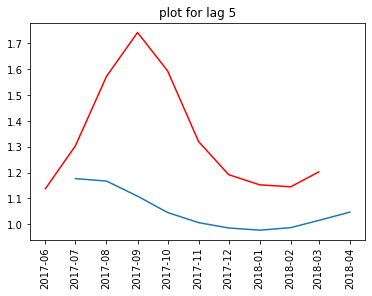

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


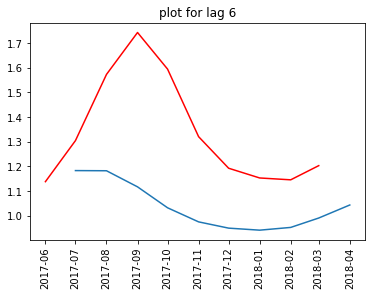

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


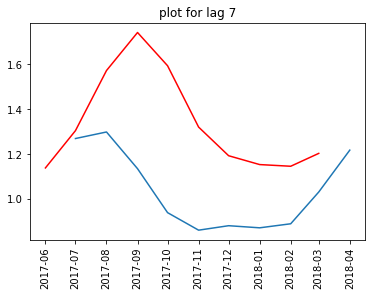

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


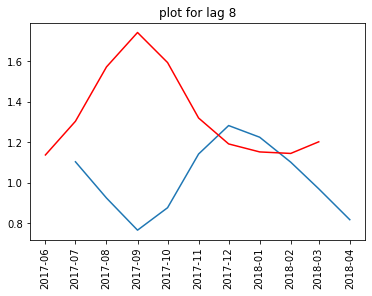

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


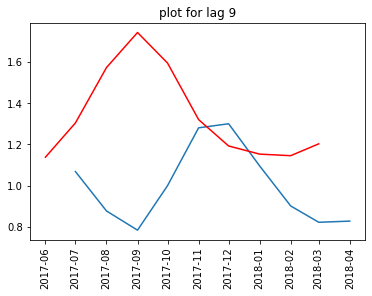

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


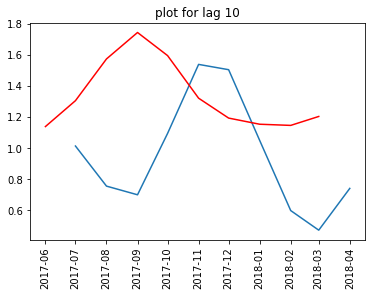

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


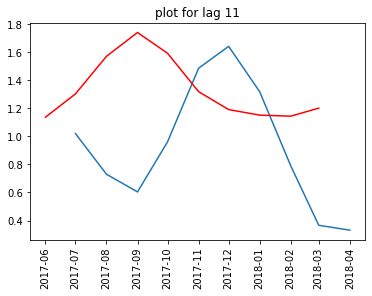

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


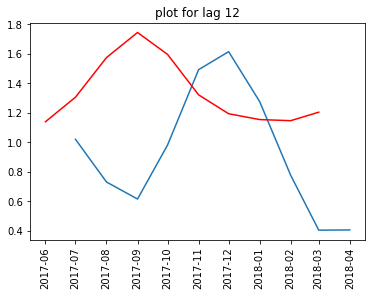

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


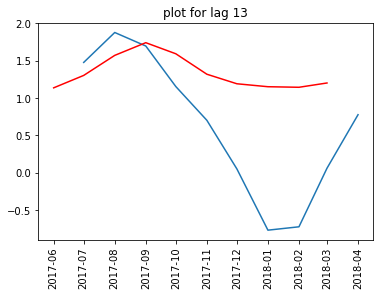

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


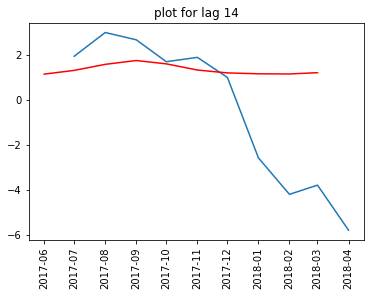

In [56]:

for p in p_r:
  try:
        model = AutoReg(X_tr_AR, lags= p).fit()
        pred = model.predict(start=len(X_tr_AR), end=len(X_tr_AR)+len(X_te_AR)-1, dynamic=False)
        plt.plot(pred)
        plt.plot(X_te_AR, color = 'red')
        plt.title("plot for lag %s" % p)
        plt.xticks(rotation='vertical')

        plt.show()

  except:
       continue

# Nhận Xét:

    trong các kết quả tuy lag = 1 cao nhất acf plot nhưng plot dự đoán cho thấy không phù hợp nhất

    Nhưng lag = 7 thì lại cho plot thích hợp nhất nhưng mae có tăng nhưng ít 

## Nên em sẽ lựa cho lag =7 sẽ là kết quả so sánh cuối

# Train AutoRegresion on the lag = 7


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


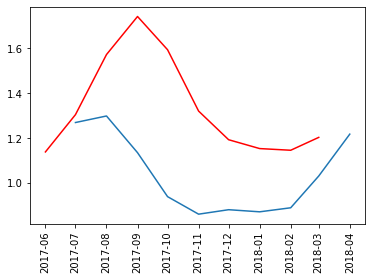

In [57]:
model_lag7 = AutoReg(X_tr_AR, lags= 7).fit()
pred_lag7 = model_lag7.predict(start=len(X_tr_AR), end=len(X_tr_AR)+len(X_te_AR)-1, dynamic=False)

plt.plot(pred_lag7)
plt.plot(X_te_AR, color = 'red')
plt.xticks(rotation='vertical')
plt.show()

In [58]:
mea_p_AR7 = mean_absolute_error(y_test_lag1, y_pred_lag1)
print('MAE: %.3f' % mea_p_AR7)

mape_AR7 = mean_absolute_percentage_error(y_test_lag1, y_pred_lag1)
print('MAPE: %.3f' % mape_AR7)

rmse_p_AR7 = sqrt(mean_absolute_error(y_test_lag1, y_pred_lag1))
print('RMSE: %.3f' % rmse_p_AR7)

MAE: 0.274
MAPE: 0.187
RMSE: 0.524


# Predict on Spokane organic price

In [59]:
df_org_price = Sp_org.iloc[:, :2]

In [60]:
df_org_price

,Date,AveragePrice
11570,2015-12,1.59
11571,2015-12,1.56
11572,2015-12,1.32
11573,2015-12,2.09
11574,2015-11,1.80
...,...,...
18172,2018-02,1.70
18173,2018-01,1.70
18174,2018-01,1.76
18175,2018-01,1.85


In [61]:
agg = {'AveragePrice':'mean'}
df_org_price = df_org_price.groupby(df_org_price['Date']).aggregate(agg).reset_index()
df_org_price

,Date,AveragePrice
0,2015-01,1.4450
1,2015-02,1.4325
2,2015-03,1.5620
3,2015-04,1.6425
4,2015-05,1.6940
5,2015-06,1.7400
6,2015-07,1.8850
7,2015-08,1.9280
8,2015-09,2.0550
9,2015-10,1.9000


In [62]:
df_org_price['Date'] = pd.to_datetime(df_org_price['Date'])
df_org_price.rename(columns={"Date":"ds", "AveragePrice":"y"}, inplace = True);
df_org_price

,ds,y
0,2015-01-01,1.4450
1,2015-02-01,1.4325
2,2015-03-01,1.5620
3,2015-04-01,1.6425
4,2015-05-01,1.6940
5,2015-06-01,1.7400
6,2015-07-01,1.8850
7,2015-08-01,1.9280
8,2015-09-01,2.0550
9,2015-10-01,1.9000


In [63]:
from statsmodels.tsa.stattools import adfuller
adfuller = adfuller(df_org_price.iloc[:, 1])
print("P-values of adfuller: ", adfuller[1])
print("ADF Statistic of adfuller: ", adfuller[0])
print("Critial Values of adfuller: ", adfuller[4])

P-values of adfuller:  0.07892924755633984
ADF Statistic of adfuller:  -2.672443971063507
Critial Values of adfuller:  {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}


In [64]:
org_train = df_org_price.iloc[:-10, :]
org_train

,ds,y
0,2015-01-01,1.4450
1,2015-02-01,1.4325
2,2015-03-01,1.5620
3,2015-04-01,1.6425
4,2015-05-01,1.6940
5,2015-06-01,1.7400
6,2015-07-01,1.8850
7,2015-08-01,1.9280
8,2015-09-01,2.0550
9,2015-10-01,1.9000


In [65]:
org_test = df_org_price.iloc[-10:, :]
org_test

,ds,y
29,2017-06-01,1.8050
30,2017-07-01,2.4700
31,2017-08-01,2.6500
32,2017-09-01,2.9200
33,2017-10-01,2.5520
34,2017-11-01,2.2375
35,2017-12-01,1.9420
36,2018-01-01,1.7625
37,2018-02-01,1.6600
38,2018-03-01,1.6275


<Figure size 1080x576 with 0 Axes>

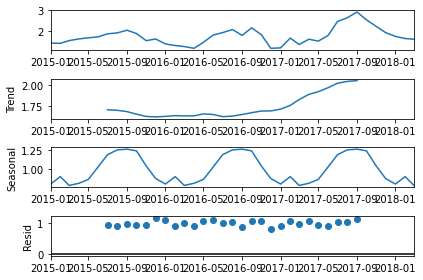

In [66]:
decompose_org = df_org_price.set_index('ds')

decompose_org
decompose_org_price = seasonal_decompose(decompose_org, model='multiplicative')

plt.figure(figsize=(15,8))
decompose_org_price.plot()


plt.show()

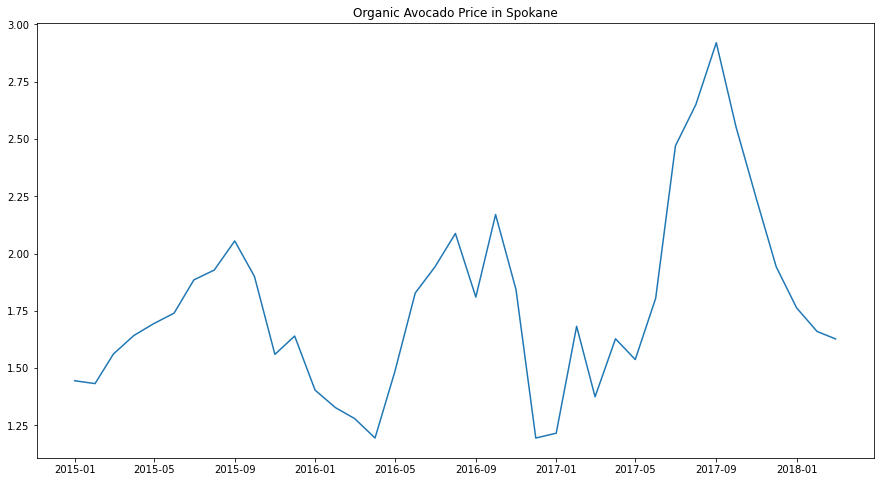

In [67]:
plt.figure(figsize=(15,8))
plt.plot(decompose_org)
plt.title("Organic Avocado Price in Spokane")
plt.show()

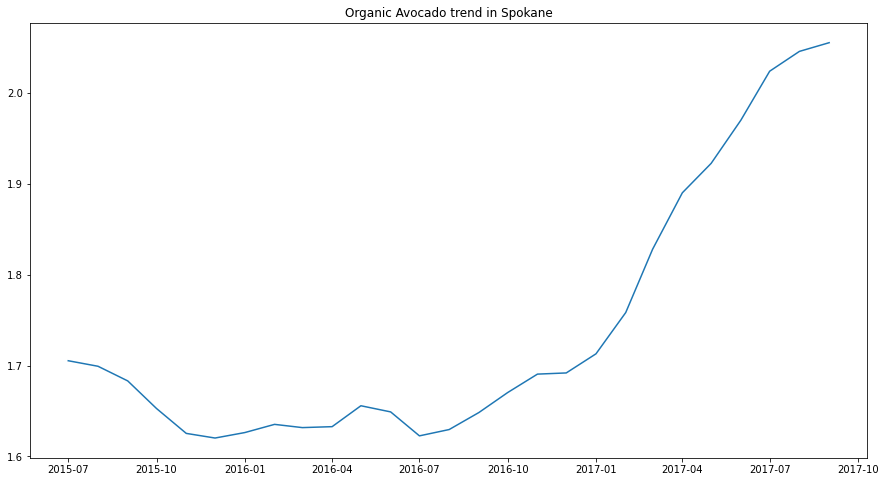

In [68]:
plt.figure(figsize=(15,8))
plt.plot(decompose_org_price.trend)
plt.title("Organic Avocado trend in Spokane")
plt.show()

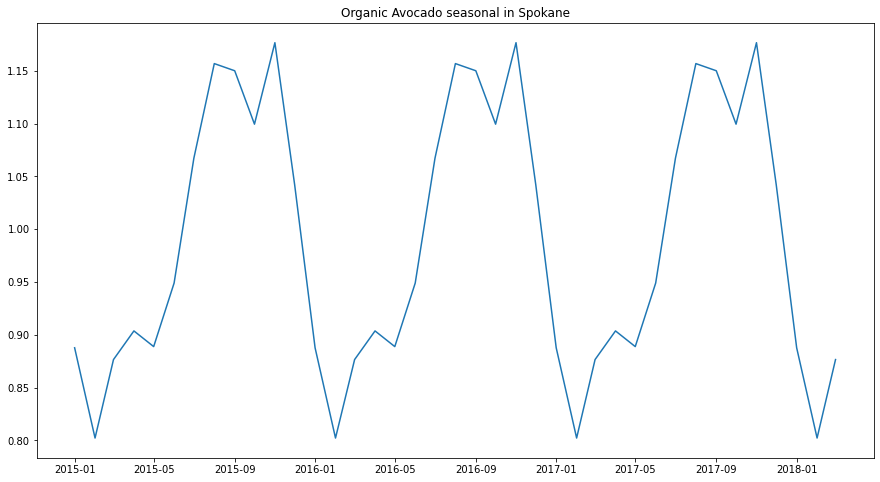

In [69]:
plt.figure(figsize=(15,8))
plt.plot(decompose_con_price.seasonal)
plt.title("Organic Avocado seasonal in Spokane")
plt.show()

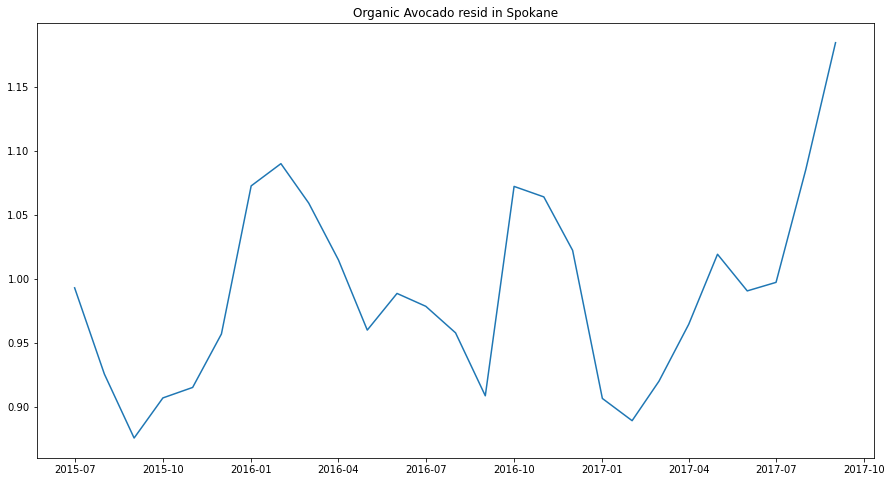

In [70]:
plt.figure(figsize=(15,8))
plt.plot(decompose_con_price.resid)
plt.title("Organic Avocado resid in Spokane")
plt.show()

# Part VI) Short Predict Organic Avocado

In [71]:

model_org_price = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model_org_price.fit(org_train)

INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


Em chọn:

    interval_width parameter là vì nếu mà dự đoán càng về sau thì trend sẽ có dao động nên em lựa parameter là để có tỷ lệ linh hoạt trong dự đoán

    yearly_seasonality=True là vì em thấy nó có tính seasonal yearly

    daily_seasonality=False, weekly_seasonality=False vì em muố dự đoán dự trên tính seasonal yearly

In [72]:
future_org_price = model_org_price.make_future_dataframe(periods=22, freq='M')

In [73]:
future_org_price

,ds
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [74]:
months_org = pd.date_range('2017-06-01', '2019-03-01', 
                       freq='MS').strftime("%Y-%m-%d").tolist()
months_org

['2017-06-01',
 '2017-07-01',
 '2017-08-01',
 '2017-09-01',
 '2017-10-01',
 '2017-11-01',
 '2017-12-01',
 '2018-01-01',
 '2018-02-01',
 '2018-03-01',
 '2018-04-01',
 '2018-05-01',
 '2018-06-01',
 '2018-07-01',
 '2018-08-01',
 '2018-09-01',
 '2018-10-01',
 '2018-11-01',
 '2018-12-01',
 '2019-01-01',
 '2019-02-01',
 '2019-03-01']

In [75]:
future_org_price = pd.DataFrame(months_org)
future_org_price.columns = ['ds']
future_org_price['ds'] = pd.to_datetime(future_org_price['ds'])
future_org_price

,ds
0,2017-06-01
1,2017-07-01
2,2017-08-01
3,2017-09-01
4,2017-10-01
5,2017-11-01
6,2017-12-01
7,2018-01-01
8,2018-02-01
9,2018-03-01


In [76]:

forecast_org_price = model_org_price.predict(future_org_price)
forecast_org_price

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-06-01,1.631828,1.720047,1.942053,1.631159,1.632517,0.197417,0.197417,0.197417,0.197417,0.197417,0.197417,0.0,0.0,0.0,1.829244
1,2017-07-01,1.635452,1.834236,2.063014,1.633734,1.637399,0.311048,0.311048,0.311048,0.311048,0.311048,0.311048,0.0,0.0,0.0,1.946500
2,2017-08-01,1.639196,1.946438,2.168983,1.636157,1.642595,0.414693,0.414693,0.414693,0.414693,0.414693,0.414693,0.0,0.0,0.0,2.053889
3,2017-09-01,1.642941,1.801310,2.041955,1.638256,1.648065,0.270612,0.270612,0.270612,0.270612,0.270612,0.270612,0.0,0.0,0.0,1.913553
4,2017-10-01,1.646565,1.997388,2.229236,1.639951,1.653508,0.462565,0.462565,0.462565,0.462565,0.462565,0.462565,0.0,0.0,0.0,2.109130
5,2017-11-01,1.650310,1.670611,1.904501,1.641600,1.659487,0.133127,0.133127,0.133127,0.133127,0.133127,0.133127,0.0,0.0,0.0,1.783437
6,2017-12-01,1.653934,1.277033,1.509397,1.643248,1.665262,-0.261667,-0.261667,-0.261667,-0.261667,-0.261667,-0.261667,0.0,0.0,0.0,1.392267
7,2018-01-01,1.657679,1.244126,1.471659,1.644157,1.671437,-0.297291,-0.297291,-0.297291,-0.297291,-0.297291,-0.297291,0.0,0.0,0.0,1.360388
8,2018-02-01,1.661424,1.519106,1.740873,1.645045,1.677724,-0.033549,-0.033549,-0.033549,-0.033549,-0.033549,-0.033549,0.0,0.0,0.0,1.627874
9,2018-03-01,1.664806,1.350261,1.582105,1.645841,1.683953,-0.200355,-0.200355,-0.200355,-0.200355,-0.200355,-0.200355,0.0,0.0,0.0,1.464451


In [77]:
forecast_org_price[['ds', 'yhat']].head(10)


,ds,yhat
0,2017-06-01,1.829244
1,2017-07-01,1.946500
2,2017-08-01,2.053889
3,2017-09-01,1.913553
4,2017-10-01,2.109130
5,2017-11-01,1.783437
6,2017-12-01,1.392267
7,2018-01-01,1.360388
8,2018-02-01,1.627874
9,2018-03-01,1.464451


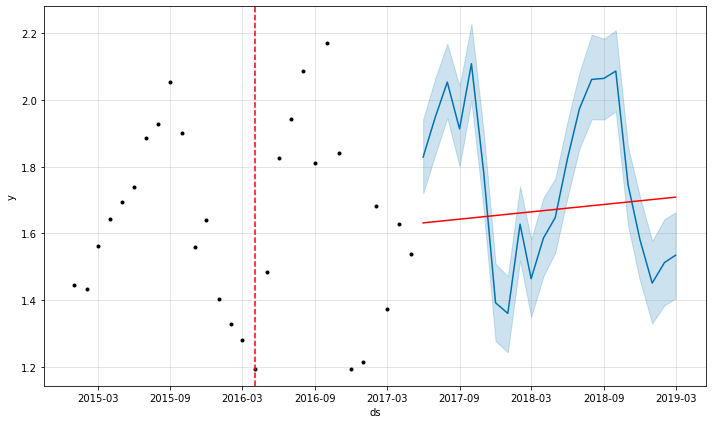

In [78]:

fig_org = model_org_price.plot(forecast_org_price)
fig_org.show()

a= add_changepoints_to_plot(fig_org.gca(), model_org_price, forecast_org_price)


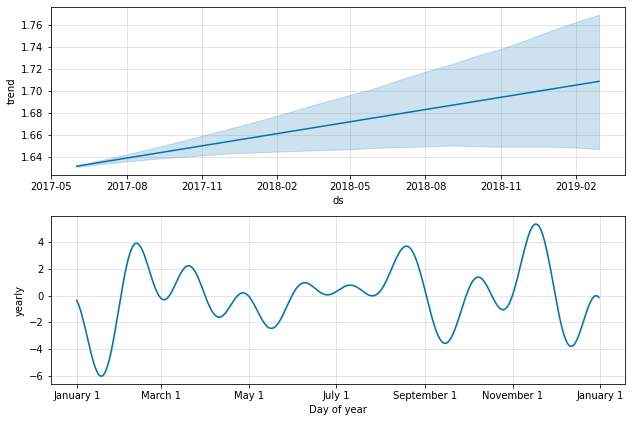

In [79]:
fig_org1 = model_org_price.plot_components(forecast_org_price)
fig_org1.show()

In [80]:
org_test = org_test['y'].values
org_y_pred = forecast_org_price['yhat'].values[:10]

org_mea_p = mean_absolute_error(org_test, org_y_pred)
print('MAE: %.3f' % org_mea_p)

MAE: 0.419


In [81]:
org_mape = mean_absolute_percentage_error(org_test, org_y_pred)
print('MAPE: %.3f' % org_mape)

MAPE: 0.180


In [82]:
org_rmse_p = sqrt(mean_absolute_error(org_test, org_y_pred))
print('RMSE: %.3f' % org_rmse_p)

RMSE: 0.648


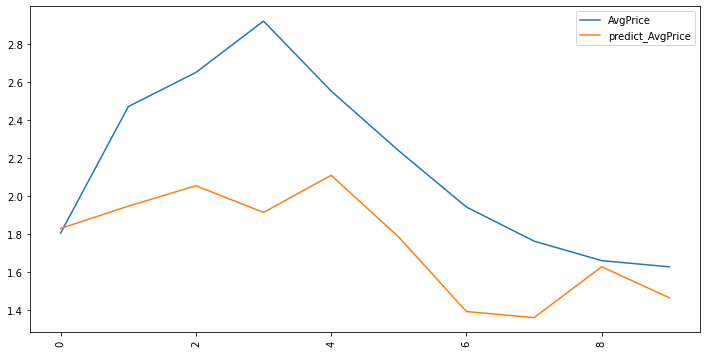

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(org_test, label="AvgPrice")
plt.plot(org_y_pred, label="predict_AvgPrice")
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

# Part VII) Long Predict on Spokane origanic avocado price

In [84]:
from pandas._libs.tslibs import period
long_org_model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
long_org_model.fit(df_org_price)
long_org_future = long_org_model.make_future_dataframe(periods=12*5, freq='M')

In [85]:
long_org_forecast = long_org_model.predict(long_org_future)

In [86]:
long_org_forecast[['ds', 'trend', ]].tail(12)

,ds,trend
87,2022-03-31,3.368813
88,2022-04-30,3.394245
89,2022-05-31,3.420524
90,2022-06-30,3.445956
91,2022-07-31,3.472235
92,2022-08-31,3.498515
93,2022-09-30,3.523947
94,2022-10-31,3.550226
95,2022-11-30,3.575658
96,2022-12-31,3.601937


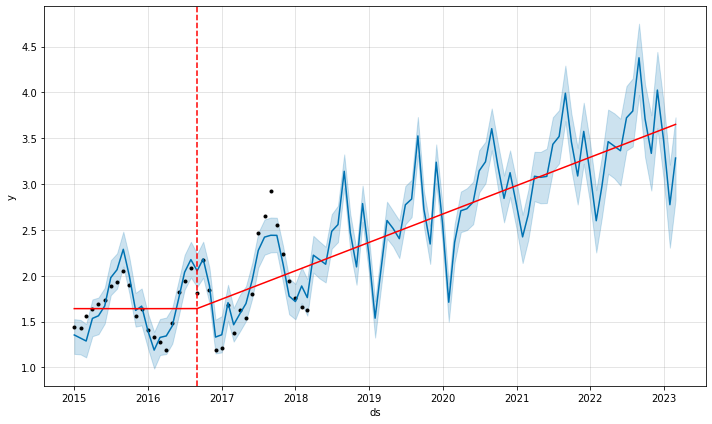

In [87]:

fig_org_long = long_org_model.plot(long_org_forecast)
fig_org_long.show()

a_org_long= add_changepoints_to_plot(fig_org_long.gca(), long_org_model, long_org_forecast)

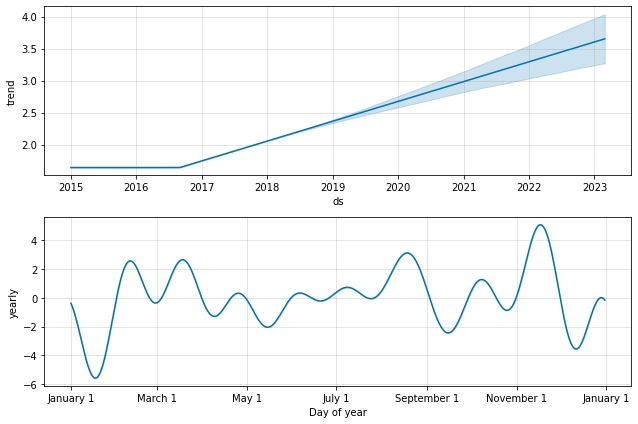

In [88]:
fig_org_long = long_org_model.plot_components(long_org_forecast)
fig_org_long.show()

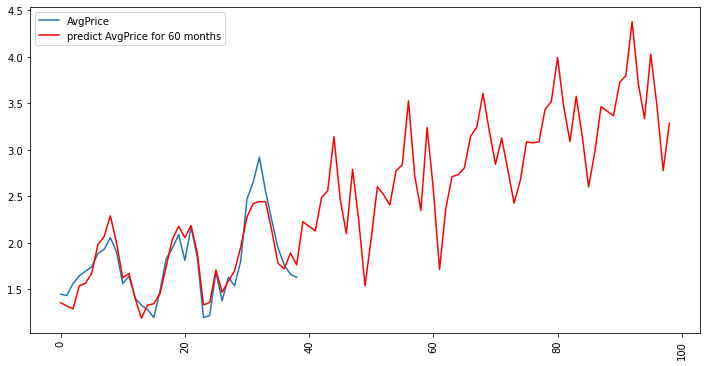

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(df_org_price['y'], label="AvgPrice")
plt.plot(long_org_forecast['yhat'], label="predict AvgPrice for 60 months", color ='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [90]:
decompose_org

,y
ds,
2015-01-01,1.4450
2015-02-01,1.4325
2015-03-01,1.5620
2015-04-01,1.6425
2015-05-01,1.6940
2015-06-01,1.7400
2015-07-01,1.8850
2015-08-01,1.9280
2015-09-01,2.0550


In [91]:
X_tr_AR_org = decompose_org.query('ds <= "2017-06-01"')
X_te_AR_org = decompose_org.query('ds >= "2017-06-01"')

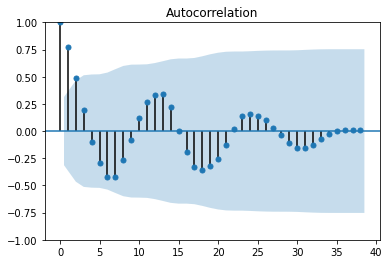

In [92]:


plot_acf(decompose_org, lags=38)
plt.show()

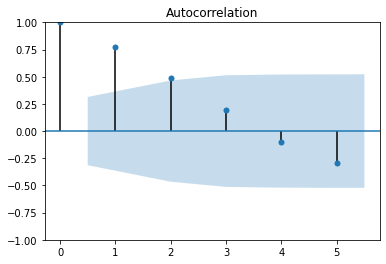

In [93]:
plot_acf(decompose_org, lags=5)
plt.show()

In [94]:
model_lag1_org = AutoReg(X_tr_AR_org, lags= 1).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [95]:
pred_lag1_org = model_lag1_org.predict(start=len(X_tr_AR_org), end=len(X_tr_AR_org)+len(X_te_AR_org)-1, dynamic=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [96]:

y_test_lag1_org = X_te_AR_org['y'].values
y_pred_lag1_org = pred_lag1_org.values

mea_p_AR1_org = mean_absolute_error(y_test_lag1_org, y_pred_lag1_org)
print('MAE: %.3f' % mea_p_AR1_org)


MAE: 0.484


In [97]:
mape_AR1_org = mean_absolute_percentage_error(y_test_lag1_org, y_pred_lag1_org)
print('MAPE: %.3f' % mape_AR1_org)

MAPE: 0.193


In [98]:
rmse_p_AR1_org = sqrt(mean_absolute_error(y_test_lag1_org, y_pred_lag1_org))
print('RMSE: %.3f' % rmse_p_AR1_org)

RMSE: 0.696


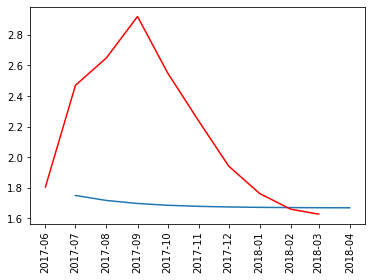

In [99]:
plt.plot(pred_lag1_org)
plt.plot(X_te_AR_org, color = 'red')
plt.xticks(rotation='vertical')
plt.show()

# Showing the MAE and plot of all the possible lags

In [100]:
p_r=range(0, 15)

In [101]:
y_test_AR_org = X_te_AR_org['y'].values

In [102]:
mae_org=[]
order1_org=[]

In [103]:

for p in p_r:
  try:
    model = AutoReg(X_tr_AR_org, lags= p).fit()
    pred = model.predict(start=len(X_tr_AR_org), end=len(X_tr_AR_org)+len(X_te_AR_org)-1, dynamic=False)
    error = mean_absolute_error(y_test_AR_org, pred)
    order1_org.append(p)
    mae_org.append(p)
    mae_org.append(error)

  except:
       continue


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain t

In [104]:
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct

In [105]:
dict_mae_org = Convert(mae_org)
dict_mae_org

{0: 0.5226700000000002,
 1: 0.4844439789451041,
 2: 0.4827692313878803,
 3: 0.48894650100050263,
 4: 0.49756493007668545,
 5: 0.5009709832723199,
 6: 0.5354539987590333,
 7: 0.5779108517555314,
 8: 0.6190582509973364,
 9: 0.5506482767992835,
 10: 0.5792738817924474,
 11: 0.5686589757359937,
 12: 0.6804520785704952,
 13: 0.752496004791805,
 14: 1.112056469527395}

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


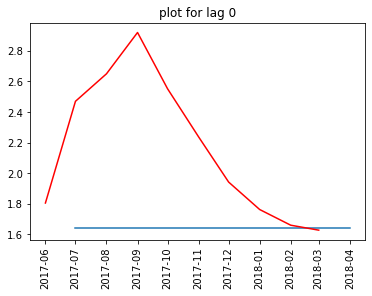

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


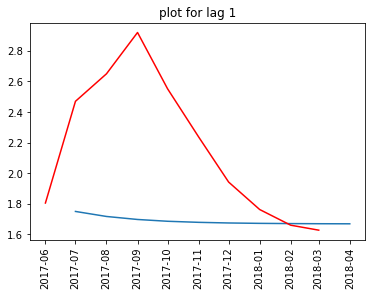

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


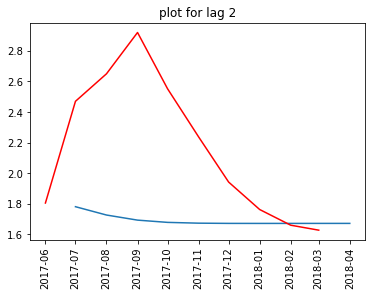

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


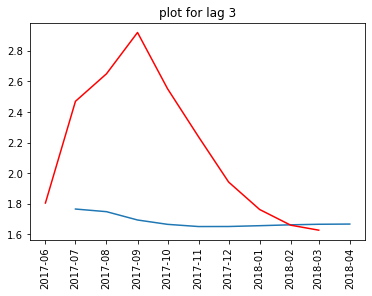

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


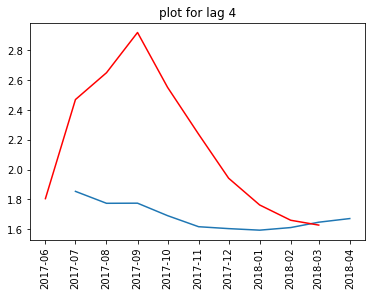

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


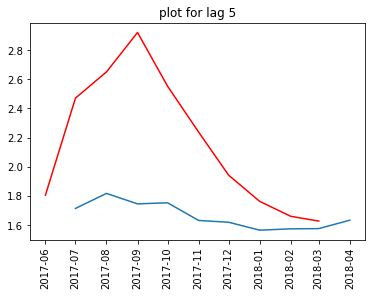

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


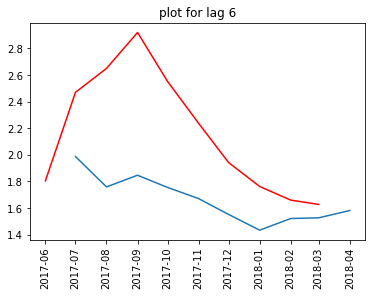

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


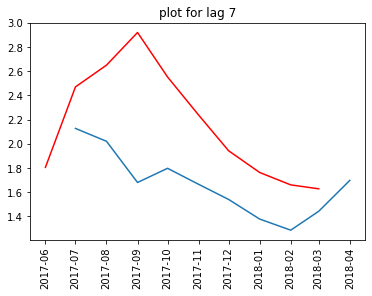

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


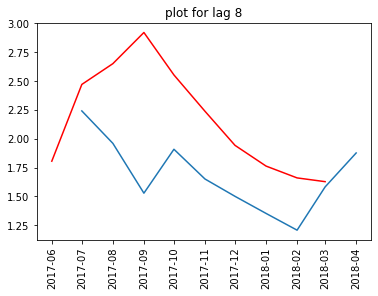

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


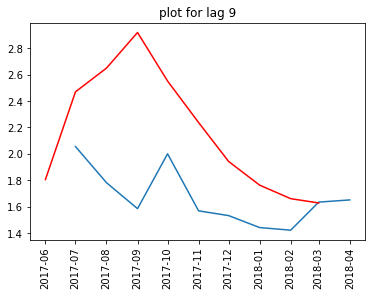

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


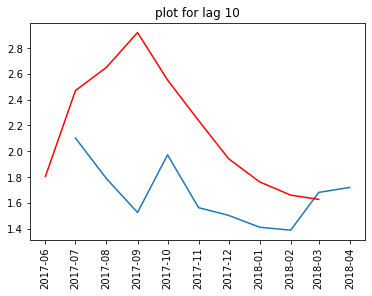

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


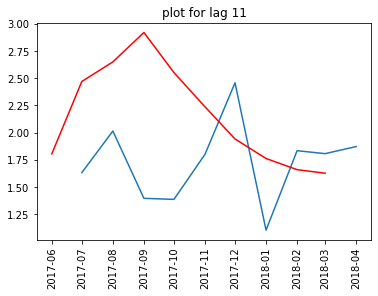

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


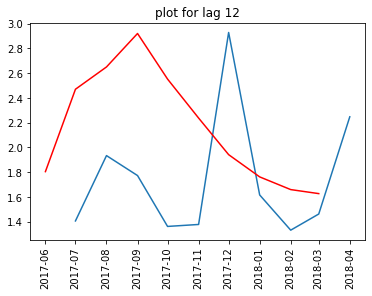

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


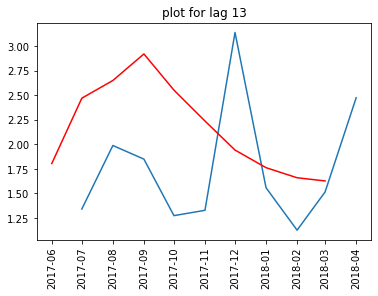

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


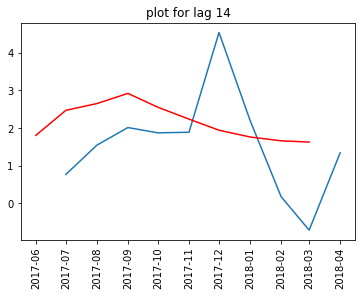

In [106]:

for p in p_r:
  try:
        model = AutoReg(X_tr_AR_org, lags= p).fit()
        pred = model.predict(start=len(X_tr_AR_org), end=len(X_tr_AR_org)+len(X_te_AR_org)-1, dynamic=False)
        plt.plot(pred)
        plt.plot(X_te_AR_org, color = 'red')
        plt.title("plot for lag %s" % p)
        plt.xticks(rotation='vertical')

        plt.show()

  except:
       continue

# Nhận Xét:

    trong các kết quả tuy lag = 1 cao nhất trong plot acf nhưng plot cho thấy không phù hợp nhất

    Nhưng lag = 11 thì lại cho plot thích hợp nhất nhưng mae có tăng nhưng ít 

## Nên em sẽ lựa cho lag =11 sẽ là kết quả so sánh cuối

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


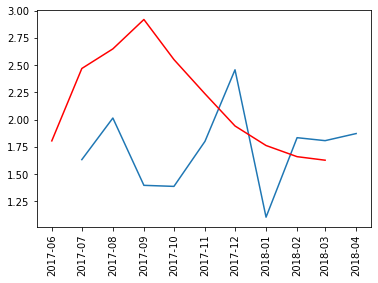

In [107]:
model_lag11_org = AutoReg(X_tr_AR_org, lags= 11).fit()
pred_lag11_org = model_lag11_org.predict(start=len(X_tr_AR_org), end=len(X_tr_AR_org)+len(X_te_AR_org)-1, dynamic=False)

plt.plot(pred_lag11_org)
plt.plot(X_te_AR_org, color = 'red')
plt.xticks(rotation='vertical')
plt.show()

In [108]:
mea_p_AR11_org = mean_absolute_error(y_test_lag1_org, pred_lag11_org)
print('MAE: %.3f' % mea_p_AR11_org)

mape_AR11_org = mean_absolute_percentage_error(y_test_lag1_org, pred_lag11_org)
print('MAPE: %.3f' % mape_AR11_org)

rmse_p_AR11_org = sqrt(mean_absolute_error(y_test_lag1_org, pred_lag11_org))
print('RMSE: %.3f' % rmse_p_AR11_org)

MAE: 0.569
MAPE: 0.238
RMSE: 0.754


# Nhận xét:

    Về lag = 11 chỉ số mae sẽ hơi cao nhưng sẽ phù hợp hơn về plot

# Kết luận ở đây là gì?

In [116]:
test_result = {'tên thuật toán':['Prophet_con', 'Autoregression_lag_1_con', 'Autoregression_lag_7_con', 'Prophet_org', 'Autoregression_lag_1_org', 'Autoregression_lag_11_org'],
               'MAE':[mea_p, mea_p_AR1, mea_p_AR7, org_mea_p, mea_p_AR1_org , mea_p_AR11_org],
               'MAPE':[mape, mape_AR1, mape_AR7, org_mape, mape_AR1_org , mape_AR11_org],
               'RMSE':[rmse_p, rmse_p_AR1, rmse_p_AR7, org_rmse_p, rmse_p_AR1_org , rmse_p_AR11_org],}
df_result = pd.DataFrame(test_result)
df_result

,tên thuật toán,MAE,MAPE,RMSE
0,Prophet_con,0.199899,0.137253,0.447100
1,Autoregression_lag_1_con,0.274245,0.187404,0.523684
2,Autoregression_lag_7_con,0.274245,0.187404,0.523684
3,Prophet_org,0.419425,0.180223,0.647631
4,Autoregression_lag_1_org,0.484444,0.193393,0.696020
5,Autoregression_lag_11_org,0.568659,0.238157,0.754095


# Tổng kết:

    Kết quả chung là có xu hướng đi lên nên rất thích hợp cho tăng sản lượng bán

    Ở tất cả các thông số Prophet đều tốt hơn Autoregression trên tất cả các tunning